In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from scipy.fft import fft, ifft
import datetime

In [2]:
data = np.loadtxt('./NM_data.csv',delimiter=',',skiprows=1,usecols=(1,3))

In [4]:
data_n=data

In [7]:
fractional_time = data [:,0]

In [9]:
print(fractional_time)

[1969.        1969.0000095 1969.000019  ... 2024.8770207 2024.8770302
 2024.8770397]


In [12]:
CCR = data [:,1]

In [14]:
CCR[ CCR==0 ] = np.nan
#removes zero results

In [16]:
CCR[ CCR>=8200 ] = np.nan
#removes the 70000 result

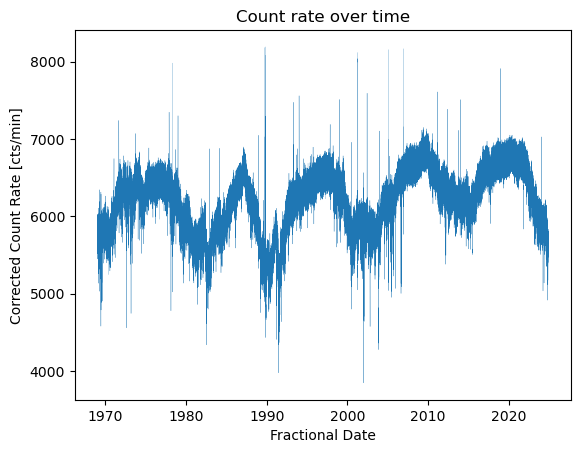

In [18]:
plt.plot(fractional_time,CCR,linewidth=0.2)
plt.xlabel('Fractional Date')
plt.ylabel('Corrected Count Rate [cts/min]')
plt.title('Count rate over time')
plt.savefig('Count rate graph all time 5 minute intervals (cleaned up)')

In [121]:
np.amax(CCR)

NameError: name 'CCR' is not defined

In [57]:
fft_data=fft(data_n) #data array get messed up for some reason so data_n is needed

In [59]:
data [:,1]

array([5782., 5711., 5742., ..., 5683., 5669., 5668.])

In [61]:
fft_data

array([nan -0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj])

In [ ]:
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

C:\Users\James\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\James\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


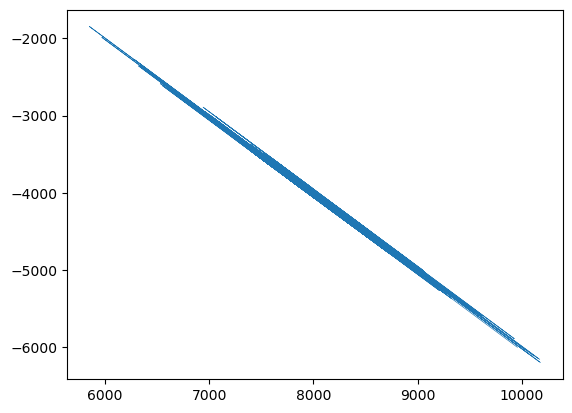

In [49]:
plt.plot(fft_data[:,0],fft_data[:,1],linewidth=0.5)

In [11]:
data_1 = pd.read_csv('./NM_data.csv',delimiter=',',index_col=0)

In [25]:
data_1

,FractionalDate,UncorrectedCountRate[cts/min],CorrectedCountRate[cts/min],Pressure[mbar]
Timestamp,,,,
1969-01-01 00:00:00+00:00,1969.000000,5271,5782,1012.50
1969-01-01 00:05:00+00:00,1969.000010,5205,5711,1012.53
1969-01-01 00:10:00+00:00,1969.000019,5232,5742,1012.57
1969-01-01 00:15:00+00:00,1969.000029,5205,5714,1012.60
1969-01-01 00:20:00+00:00,1969.000038,5181,5689,1012.63
...,...,...,...,...
2024-11-16 23:35:00+00:00,2024.877002,6981,5656,971.28
2024-11-16 23:40:00+00:00,2024.877011,7182,5818,971.30
2024-11-16 23:45:00+00:00,2024.877021,7013,5683,971.32


In [27]:
data_1.index=pd.to_datetime(data_1.index)

In [29]:
print(data_1.index.dtype, data_1)

datetime64[ns, UTC]                            FractionalDate  UncorrectedCountRate[cts/min]  \
Timestamp                                                                  
1969-01-01 00:00:00+00:00     1969.000000                           5271   
1969-01-01 00:05:00+00:00     1969.000010                           5205   
1969-01-01 00:10:00+00:00     1969.000019                           5232   
1969-01-01 00:15:00+00:00     1969.000029                           5205   
1969-01-01 00:20:00+00:00     1969.000038                           5181   
...                                   ...                            ...   
2024-11-16 23:35:00+00:00     2024.877002                           6981   
2024-11-16 23:40:00+00:00     2024.877011                           7182   
2024-11-16 23:45:00+00:00     2024.877021                           7013   
2024-11-16 23:50:00+00:00     2024.877030                           6998   
2024-11-16 23:55:00+00:00     2024.877040                           

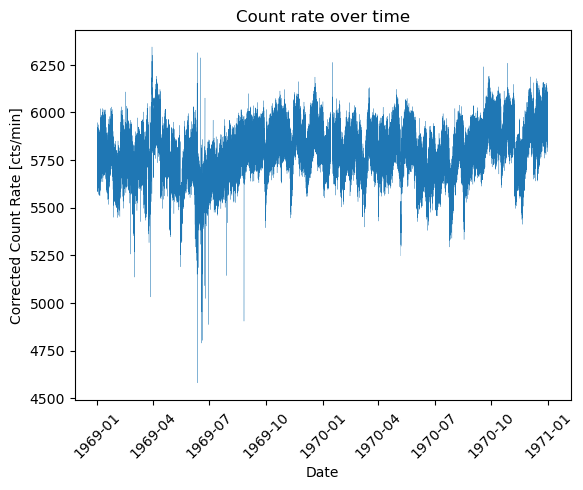

In [103]:
sp = '1969-01-01 00:00:00'
ep = '1971-01-01 00:00:00'
df_plot = data_1.loc[sp:ep]
plt.plot(df_plot.index, df_plot['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Corrected Count Rate [cts/min]')
plt.title('Count rate over time')
plt.savefig('Count rate graph 1969-01-01 to 1970-01-01 5 minute intervals')

In [ ]:
y=data_1['CorrectedCountRate[cts/min]'].replace(0, np.nan)